<h1>MNIST digit recognition with LeNet</h1>

In this practical session we will build a convolutional neural network that is able to recognise the digits 0-9 in images.

You can run the code in a cell by selecting the cell and pressing Shift+Enter.

<h4>1) Import statements</h4>
First, import some of the packages we will need (run the cell below).

Documentation for each of these packages can be found online: <br>
For numpy: https://docs.scipy.org/doc/numpy-dev/user/quickstart.html <br>
For matplotlib: http://matplotlib.org/api/pyplot_api.html <br>
For lasagne: http://lasagne.readthedocs.io <br>
For random: https://docs.python.org/2/library/random.html <br>

In [1]:
import cPickle
import gzip
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import theano
import lasagne
import time
import random
random.seed(0)

/Users/OsmanAkdag/anaconda2/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


<h4>2) Loading the data</h4>
Download the data from: http://deeplearning.net/data/mnist/mnist.pkl.gz and save it somewhere on your disc. The function below loads the data from the location where you have saved it (path) and stores it in numpy arrays. The data is already split in a train set, a validation set and a test set. Each of these three sets are saved in two separate variables, one containing the labels and one containing the images. The labels are lists of numbers between 0 and 9. The images are 4-dimensional arrays (of the same length) with the image dimensions in the last 2 dimensions.

Change the path in the second cell below to the location where you have saved it and run the two cells.

In [2]:
def loadMNIST(path):
    f = gzip.open(path, 'rb')
    train_set, valid_set, test_set = cPickle.load(f)
    f.close()
    
    train_set_labels = train_set[1]
    train_set_images = np.resize(train_set[0],(len(train_set_labels),1,28,28))
    train_set_images = np.pad(train_set_images,((0,0),(0,0),(2,2),(2,2)),'constant', constant_values=0)
   
    valid_set_labels = valid_set[1]
    valid_set_images = np.resize(valid_set[0],(len(valid_set_labels),1,28,28))
    valid_set_images = np.pad(valid_set_images,((0,0),(0,0),(2,2),(2,2)),'constant', constant_values=0)

    test_set_labels = test_set[1]
    test_set_images = np.resize(test_set[0],(len(test_set_labels),1,28,28))
    test_set_images = np.pad(test_set_images,((0,0),(0,0),(2,2),(2,2)),'constant', constant_values=0)
    
    return train_set_labels, train_set_images, valid_set_labels, valid_set_images, test_set_labels, test_set_images

In [3]:
train_set_labels, train_set_images, valid_set_labels, valid_set_images, test_set_labels, test_set_images = loadMNIST(r'/Users/OsmanAkdag/Documents/Master/Jaar_1_Q3/Capita_selecta_medical_image_analysis/FirstAssignment/mnist.pkl.gz')

<h4>3) Visualising the data</h4>
Let's look at the data we've just loaded! 

How many samples are in each set? (Use .shape to see the dimensions) 

How large are the images? 

How many samples are there for each of the 10 digits? 

Show some of the images with plt.imshow (use cmap='gray_r' for black digits on a white background and interpolation='none' to see the real pixels), you can access one of the training images as: train_set_images[i,0].

ntrain_samples = 50000
nvalid_samples = 10000
ntest_samples = 10000
Number of Images with Digit 0 = 4932
Number of Images with Digit 1 = 5678
Number of Images with Digit 2 = 4968
Number of Images with Digit 3 = 5101
Number of Images with Digit 4 = 4859
Number of Images with Digit 5 = 4506
Number of Images with Digit 6 = 4951
Number of Images with Digit 7 = 5175
Number of Images with Digit 8 = 4842
Number of Images with Digit 9 = 4988
Size of train images are: 32 x 32
Size of valid images are: 32 x 32
Size of test images are: 32 x 32


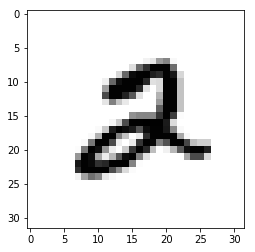

In [4]:
ntrain_samples = train_set_images.shape # 50000 Samples, 32x32 pixels
nvalid_samples = valid_set_images.shape # 10000 Samples, 32x32 pixels
ntest_samples = test_set_images.shape # 10000 Samples, 32x32 pixels
print "ntrain_samples =", ntrain_samples[0]
print "nvalid_samples =", nvalid_samples[0]
print "ntest_samples =", ntest_samples[0]

Digit_0 = []
Digit_1 = [] 
Digit_2 = [] 
Digit_3 = [] 
Digit_4 = []
Digit_5 = [] 
Digit_6 = [] 
Digit_7 = [] 
Digit_8 = []
Digit_9 = []


for i in range(len(train_set_labels)):
    if train_set_labels[i] == 0:
        Digit_0.append(train_set_labels[i])
    elif train_set_labels[i] == 1:
        Digit_1.append(train_set_labels[i])
    elif train_set_labels[i] == 2:
        Digit_2.append(train_set_labels[i])
    elif train_set_labels[i] == 3:
        Digit_3.append(train_set_labels[i])
    elif train_set_labels[i] == 4:
        Digit_4.append(train_set_labels[i])
    elif train_set_labels[i] == 5:
        Digit_5.append(train_set_labels[i])
    elif train_set_labels[i] == 6:
        Digit_6.append(train_set_labels[i])
    elif train_set_labels[i] == 7:
        Digit_7.append(train_set_labels[i])
    elif train_set_labels[i] == 8:
        Digit_8.append(train_set_labels[i])
    elif train_set_labels[i] == 9:
        Digit_9.append(train_set_labels[i])
print "Number of Images with Digit 0 =", str(len(Digit_0))
print "Number of Images with Digit 1 =", str(len(Digit_1))
print "Number of Images with Digit 2 =", str(len(Digit_2))
print "Number of Images with Digit 3 =", str(len(Digit_3))
print "Number of Images with Digit 4 =", str(len(Digit_4))
print "Number of Images with Digit 5 =", str(len(Digit_5))
print "Number of Images with Digit 6 =", str(len(Digit_6))
print "Number of Images with Digit 7 =", str(len(Digit_7))
print "Number of Images with Digit 8 =", str(len(Digit_8))
print "Number of Images with Digit 9 =", str(len(Digit_9))

print "Size of train images are:", ntrain_samples[2], "x", ntrain_samples[3]
print "Size of valid images are:", nvalid_samples[2], "x", nvalid_samples[3]
print "Size of test images are:", ntest_samples[2], "x", ntest_samples[3]

plt.imshow(train_set_images[5,0], cmap='gray_r', interpolation = 'none')

<h4>4) One-hot-encoding</h4>
Convert the labels from a number between 0 and 9 to 'one-hot-encoding'. This means that for a label with number 3, there should be a 1 at element 3 and 0 everywhere else, i.e. [0, 0, 0, 1, 0, 0, 0, 0 ,0 ,0]. These are our target nodes, the node at position 3 should be active when the input image shows a 3. The code below does this for the training labels. 

Do the same for the validation labels!

In [5]:
train_labels = np.zeros((len(train_set_labels),10),dtype=np.int16)        
for n in xrange(10):
    train_labels[:,n] = train_set_labels==n

print "Training set labels: \n", str(train_set_labels[:10]),"\n"
print "Training labels: \n", str(train_labels[:10])

validation_labels = np.zeros((len(valid_set_labels),10),dtype = np.int16)
for j in xrange(10):
    validation_labels[:,j] = valid_set_labels==j
    
print "Validation set labels: \n", str(valid_set_labels[:10]),"\n"
print "Validation labels: \n", str(validation_labels[:10])


Training set labels: 
[5 0 4 1 9 2 1 3 1 4] 

Training labels: 
[[0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]]
Validation set labels: 
[3 8 6 9 6 4 5 3 8 4] 

Validation labels: 
[[0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0]]


<h4>5) Building the network</h4>
The function below builds the LeNet network as we looked at in the lecture. The layers are defined as functions with as input the previous network and as output the new network with the new layer added. The print network.output_shape statement shows the dimensions after the current layer. 

Can you recognise all the elements of the network from the lecture?

In [6]:
def buildLeNet(X1):
    # Input
    inputlayer = lasagne.layers.InputLayer(shape=(None, 1, 32, 32),input_var=X1)    
    print inputlayer.output_shape
    
    # 2D Convolution layer
    layer1 = lasagne.layers.Conv2DLayer(inputlayer, num_filters=6, filter_size=(5,5), nonlinearity=lasagne.nonlinearities.rectify, W=lasagne.init.GlorotUniform())
    print layer1.output_shape 
    
    # 2D Max-pooling layer
    layer2 = lasagne.layers.MaxPool2DLayer(layer1, pool_size=(2, 2))
    print layer2.output_shape 
    
    # 2D Convolution layer
    layer3 = lasagne.layers.Conv2DLayer(layer2, num_filters=16, filter_size=(5,5), nonlinearity=lasagne.nonlinearities.rectify, W=lasagne.init.GlorotUniform())
    print layer3.output_shape 
    
    # 2D Max-pooling layer
    # Output van layer 4 wordt een 4D tensor
    layer4 = lasagne.layers.MaxPool2DLayer(layer3, pool_size=(2, 2))
    print layer4.output_shape 
    
    # 4D tensor omgooien naar 2D
    layer4 = lasagne.layers.flatten(layer4)
    print layer4.output_shape 
    
    # First fully connected layer
    layer5 = lasagne.layers.DenseLayer(layer4,num_units=120,nonlinearity=lasagne.nonlinearities.rectify)    
    print layer5.output_shape 
    
    # Second fully connected layer
    layer6 = lasagne.layers.DenseLayer(layer5,num_units=84,nonlinearity=lasagne.nonlinearities.rectify)
    print layer6.output_shape 
    
    # Outputlayer using softmax regression
    outputlayer = lasagne.layers.DenseLayer(layer6,num_units=10,nonlinearity=lasagne.nonlinearities.softmax)     
    print outputlayer.output_shape 
    
    return layer1, layer2, layer3, layer4, layer5, layer6, outputlayer

In [7]:
X = theano.tensor.tensor4()
Y = theano.tensor.matrix()
layer1, layer2, layer3, layer4, layer5, layer6, outputlayer = buildLeNet(X)

(None, 1, 32, 32)
(None, 6, 28, 28)
(None, 6, 14, 14)
(None, 16, 10, 10)
(None, 16, 5, 5)
(None, 400)
(None, 120)
(None, 84)
(None, 10)


<h4>6) Training function</h4>
Define the functions for training the network. We will use negative log likelihood (called categorical cross-entropy in lasagne) as loss function (second row) and stochastic gradient descent with momentum as optimiser (fourth row).

In [8]:
outputtrain = lasagne.layers.get_output(outputlayer) #function that gets the output from the network defined before.
trainloss = lasagne.objectives.categorical_crossentropy(outputtrain, Y).mean() #function that computes the mean crossentropy between the output and the real labels.
params = lasagne.layers.get_all_params(outputlayer, trainable=True) #function that gets all the parameters (weights) in the network.
updates = lasagne.updates.momentum(trainloss, params, learning_rate=0.001) #function that performs an update of the weights based on the loss.
train = theano.function(inputs=[X, Y], outputs=trainloss, updates=updates, allow_input_downcast=True) #function that does all the above based on training samples X and real labels Y.

/Users/OsmanAkdag/anaconda2/lib/python2.7/site-packages/lasagne/layers/conv.py:489: UserWarning: The `image_shape` keyword argument to `tensor.nnet.conv2d` is deprecated, it has been renamed to `input_shape`.
  border_mode=border_mode)


<h4>7) Validation function</h4>
Define a function to validate the network.

In [9]:
validate = theano.function(inputs=[X, Y], outputs=trainloss, allow_input_downcast=True) #function that computes the loss without performing an update

<h4>8) Test function</h4>
Define the functions for testing the network. 

In [10]:
outputtest = lasagne.layers.get_output(outputlayer, deterministic=True) #function that gets the output from the network defined before.
test = theano.function(inputs=[X], outputs=outputtest, allow_input_downcast=True) #function that gets the output based on input X

<h4>9) Training the network</h4>
Do the training in random batches of a specific number of samples (we set the values below to 250 batches of 100 samples). 

Use random.sample(a,n) to select a random batch of n samples from array a. 

Next, use the train(X,Y) function we have defined in 6) to perform an update of the network based on a random batch of training images X and training labels Y. 

The train function returns the loss. Save the loss of each training batch in the variable 'losslist' so we can look at them later (you can use .append() to add the current loss to the list).

Also keep track of the loss for random batches from the validation set to see if your network is not overfitting on the training set. You can use validate(X,Y) from 7) to compute the loss on the validation set (without doing an update).

<b>Remember</b> that if you restart the training process from the beginning you also need to reinitialise the network by running the cells starting from 5) again.

In [11]:
trainingsamples = np.arange(len(train_set_labels)) #numbers from 0 until the number of samples
validsamples = np.arange(len(valid_set_labels))

minibatches = 250
minibatchsize = 250 

losslist = []
validlosslist = []

t0 = time.time()

for i in xrange(minibatches):
    #select random training en validation samples and perform training and validation steps here.
    randombatch_train = random.sample(trainingsamples,minibatchsize)
    X_train = train_set_images[randombatch_train]
    Y_train = train_labels[randombatch_train]
    loss = train(X_train,Y_train)
    if (i+1)%100 == 0:
        print 'Loss minibatch {}: {}'.format(i,loss)
    losslist.append(loss)
    
    randombatch_valid = random.sample(validsamples,minibatchsize)
    X_valid = valid_set_images[randombatch_valid]
    Y_valid = validation_labels[randombatch_valid]
    validloss = validate(X_valid,Y_valid)
    if (i+1)%100==0:
        print 'Loss validation minibatch {}: {}'.format(i,validloss)
    validlosslist.append(validloss)
    

t1 = time.time()
print 'Training time: {} seconds'.format(t1-t0)
# print losslist
# print validlosslist

Loss minibatch 99: 2.2451847036
Loss validation minibatch 99: 2.24827420858
Loss minibatch 199: 1.9999160706
Loss validation minibatch 199: 1.99277064616
Training time: 31.6401090622 seconds


<h4>9) Loss curves</h4>
Plot the loss curves for the training and validation sets (use plt.plot(losslist) for the training loss). 

Is 250 batches enough to train the network? How many do we need? 

What happens if you change the learning rate in 6)? 

What happens if you change the minibatchsize? 

What happens if you use another optimizer? 

Try to get the loss as low as possible! 

What happens if you make changes to the network? Use for example more or less filters or nodes, remove a layer, etc.

/Users/OsmanAkdag/anaconda2/lib/python2.7/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 'T' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/Users/OsmanAkdag/anaconda2/lib/python2.7/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/Users/OsmanAkdag/anaconda2/lib/python2.7/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/Users/OsmanAkdag/anaconda2/lib/python2.7/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 'i' instances.
A proxy artist

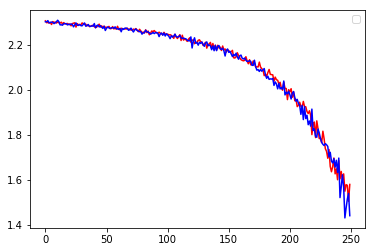

In [12]:
plt.figure()
plt.plot(losslist, '-r')
plt.plot(validlosslist, '-b')
plt.legend('Training Loss', 'Validation Loss')

# Learning rate can be changed in 6) 



<h4>10) Evaluation on the test set</h4>
Evaluate the network on the test set with the test(X) function we have defined in 8). You can use np.argmax() to select the node with the highest probability. 

How well did it do? How many of the 10 000 test samples did it label correctly?

Testing time: 0.000430107116699 seconds
[7 2 1 ..., 4 6 6]
(10000,)
[7 2 1 ..., 4 5 6]
Accuracy: 0.5904


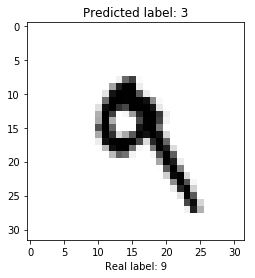

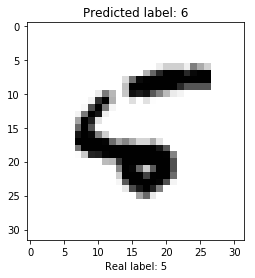

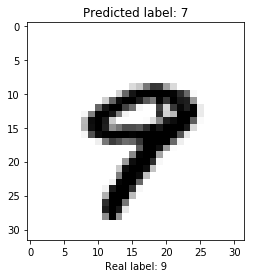

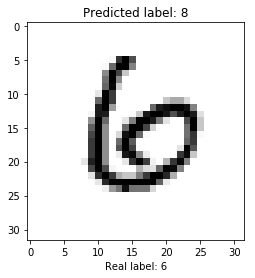

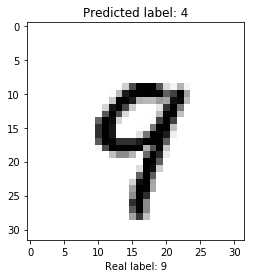

In [13]:
out = test(test_set_images)
t0 = time.time()
test_set_predictions = np.argmax(out, axis = 1) # For every row axis = 1 
t1 = time.time()
print 'Testing time: {} seconds'.format(t1-t0)
print test_set_predictions  # My result
print test_set_predictions.shape
print test_set_labels # What were the actual labels

TP = np.sum(test_set_predictions == test_set_labels) # Comparison
print 'Accuracy: {}'.format(float(TP)/float(len(test_set_labels)))

incorrect_images = test_set_images[test_set_labels!=test_set_predictions]
incorrect_labels = test_set_labels[test_set_labels!=test_set_predictions]
incorrect_predictions = test_set_predictions[test_set_labels!=test_set_predictions]
for i in xrange(5):
    plt.figure()
    plt.imshow(incorrect_images[i,0],cmap='gray_r',interpolation='none')
    plt.title('Predicted label: {}'.format(incorrect_predictions[i]))
    plt.xlabel('Real label: {}'.format(incorrect_labels[i]))

<h4>11) Visualising what the network has learned</h4>
To see what is happening within the network we can visualise the learned filters and their feature maps. We now define an additional function that obtains the feature maps after the first layer.

In [14]:
outputlayer1 = lasagne.layers.get_output(layer1) 
outputfeatures = theano.function(inputs=[X], outputs=outputlayer1, allow_input_downcast=True) 

<h4>12) Visualising the features</h4>
Let's look at the feature maps after the first layer for one of the images from the test set. We have defined the function 'outputfeatures' for that. 

Look at the shape of the features variable. 

Visualise the 6 features maps for some of the 10 000 test samples with plt.imshow

In [15]:
features = outputfeatures(test_set_images)

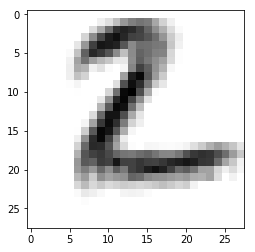

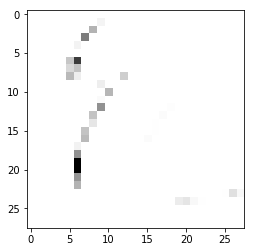

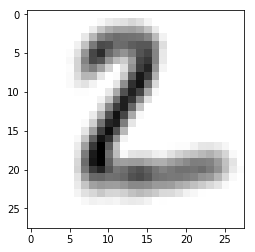

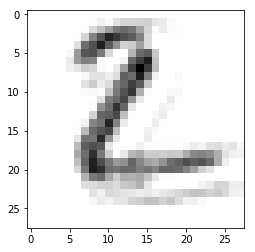

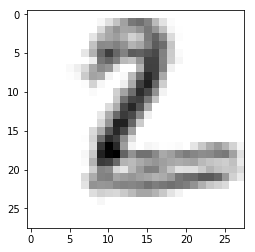

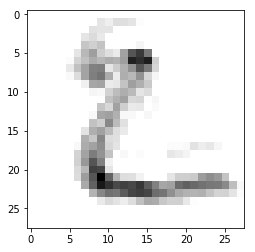

In [16]:
# My way
# plt.imshow(features[1,1,:,:])

# Pim's way
for i in xrange(6):
    plt.figure()
    plt.imshow(features[1,i],cmap='gray_r',interpolation='none')
    

<h4>13) Visualising the filters</h4>
Let's look at the filters that are learned. We can use the lasagne function 'get_all_param_values' for that. These are the filters that are applied to the images to obtain the feature maps that we saw above.

Look at the shape of the filters and biases.

Visualise the 6 filters of the first layer with plt.imshow. Do you see any structure in the learned filters?

In [17]:
weights = lasagne.layers.get_all_param_values(layer1)
filters = weights[0]
biases = weights[1]

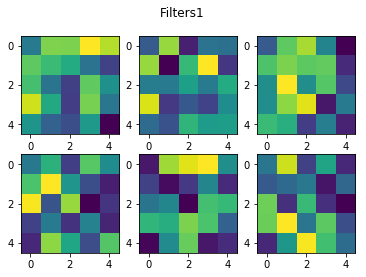

In [18]:
plt.figure(1)
plt.suptitle('Filters1')
plt.subplot(231)
plt.imshow(filters[0,0])
plt.subplot(232)
plt.imshow(filters[1,0])
plt.subplot(233)
plt.imshow(filters[2,0])
plt.subplot(234)
plt.imshow(filters[3,0])
plt.subplot(235)
plt.imshow(filters[4,0])
plt.subplot(236)
plt.imshow(filters[5,0])

<h4>14) Visualising other layers </h4>
Can you also visualise features and kernels of other layers? Take for example a look at the features after the third layer.

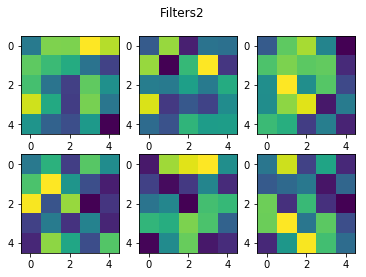

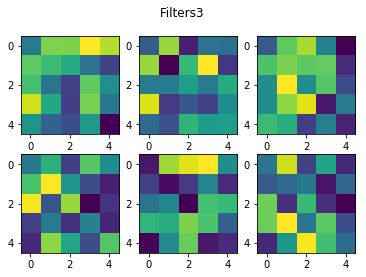

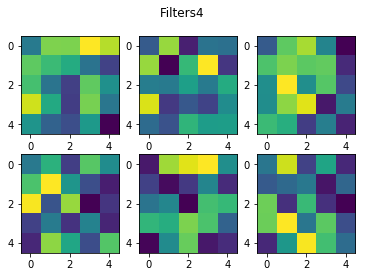

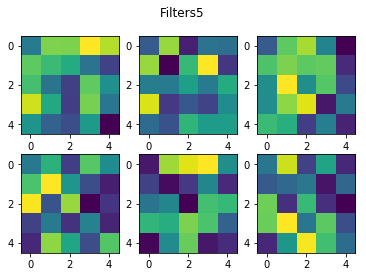

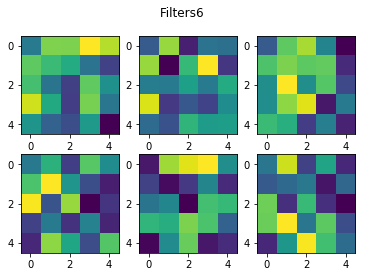

In [19]:
outputlayer2 = lasagne.layers.get_output(layer2) 
outputfeatures2 = theano.function(inputs=[X], outputs=outputlayer2, allow_input_downcast=True)
weights2 = lasagne.layers.get_all_param_values(layer2)
filters2 = weights[0]
biases2 = weights[1]

plt.figure(2)
plt.suptitle('Filters2')
plt.subplot(231)
plt.imshow(filters2[0,0])
plt.subplot(232)
plt.imshow(filters2[1,0])
plt.subplot(233)
plt.imshow(filters2[2,0])
plt.subplot(234)
plt.imshow(filters2[3,0])
plt.subplot(235)
plt.imshow(filters2[4,0])
plt.subplot(236)
plt.imshow(filters2[5,0])

outputlayer3 = lasagne.layers.get_output(layer3) 
outputfeatures3 = theano.function(inputs=[X], outputs=outputlayer3, allow_input_downcast=True)
weights3 = lasagne.layers.get_all_param_values(layer3)
filters3 = weights[0]
biases3 = weights[1]

plt.figure(3)
plt.suptitle('Filters3')
plt.subplot(231)
plt.imshow(filters3[0,0])
plt.subplot(232)
plt.imshow(filters3[1,0])
plt.subplot(233)
plt.imshow(filters3[2,0])
plt.subplot(234)
plt.imshow(filters3[3,0])
plt.subplot(235)
plt.imshow(filters3[4,0])
plt.subplot(236)
plt.imshow(filters3[5,0])

outputlayer4 = lasagne.layers.get_output(layer4) 
outputfeatures4 = theano.function(inputs=[X], outputs=outputlayer4, allow_input_downcast=True)
weights4 = lasagne.layers.get_all_param_values(layer4)
filters4 = weights[0]
biases4 = weights[1]

plt.figure(4)
plt.suptitle('Filters4')
plt.subplot(231)
plt.imshow(filters4[0,0])
plt.subplot(232)
plt.imshow(filters4[1,0])
plt.subplot(233)
plt.imshow(filters4[2,0])
plt.subplot(234)
plt.imshow(filters4[3,0])
plt.subplot(235)
plt.imshow(filters4[4,0])
plt.subplot(236)
plt.imshow(filters4[5,0])

outputlayer5 = lasagne.layers.get_output(layer5) 
outputfeatures5 = theano.function(inputs=[X], outputs=outputlayer5, allow_input_downcast=True)
weights5 = lasagne.layers.get_all_param_values(layer5)
filters5 = weights[0]
biases5 = weights[1]

plt.figure(5)
plt.suptitle('Filters5')
plt.subplot(231)
plt.imshow(filters5[0,0])
plt.subplot(232)
plt.imshow(filters5[1,0])
plt.subplot(233)
plt.imshow(filters5[2,0])
plt.subplot(234)
plt.imshow(filters5[3,0])
plt.subplot(235)
plt.imshow(filters5[4,0])
plt.subplot(236)
plt.imshow(filters5[5,0])

outputlayer6 = lasagne.layers.get_output(layer6) 
outputfeatures6 = theano.function(inputs=[X], outputs=outputlayer6, allow_input_downcast=True)
weights6 = lasagne.layers.get_all_param_values(layer6)
filters6 = weights[0]
biases6 = weights[1]

plt.figure(6)
plt.suptitle('Filters6')
plt.subplot(231)
plt.imshow(filters6[0,0])
plt.subplot(232)
plt.imshow(filters6[1,0])
plt.subplot(233)
plt.imshow(filters6[2,0])
plt.subplot(234)
plt.imshow(filters6[3,0])
plt.subplot(235)
plt.imshow(filters6[4,0])
plt.subplot(236)
plt.imshow(filters6[5,0])

<h4>15) Saving a trained model to disc</h4>
Training a network can often take a very long time. It's therefore useful to be able save a trained model to disc. You can use the functions below to save and load a trained network. This is especially useful for the project next week.

In [21]:
def save_weights(filename,network):
    with open(filename, 'wb') as f:
        cPickle.dump(lasagne.layers.get_all_param_values(network), f)

filename = '/Users/OsmanAkdag/Documents/Master/Jaar_1_Q3/Capita_selecta_medical_image_analysis/FirstAssignment/MNIST_weights_Practical_OsmanAkdag.pkl'
network = outputlayer
save_weights(filename, network)

In [22]:
def load_weights(filename, network):
    with open(filename, 'rb') as f:
        lasagne.layers.set_all_param_values(network, cPickle.load(f))

filename = '/Users/OsmanAkdag/Documents/Master/Jaar_1_Q3/Capita_selecta_medical_image_analysis/FirstAssignment/MNIST_weights_Practical_OsmanAkdag.pkl'
network = outputlayer
save_weights(filename, network)